<a href="https://colab.research.google.com/github/chernoskutov1989dv/Self-Education/blob/main/filter_noise_programm_dmitry_chernoskutov_batch_size_32_n_10000_with_metric_kfiltration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
N = 10000
data = np.array([np.sin(x/20) for x in range(N)]) + 0.1*np.random.randn(N)
ideal = np.array([np.sin(x/20) for x in range(N)])

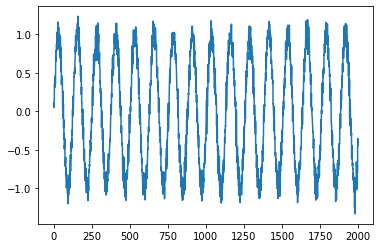

In [4]:
plt.plot (data [:2000])
plt.show()

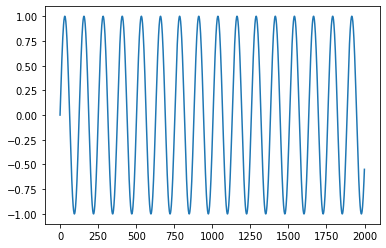

In [5]:
plt.plot (ideal [:2000])
plt.show()

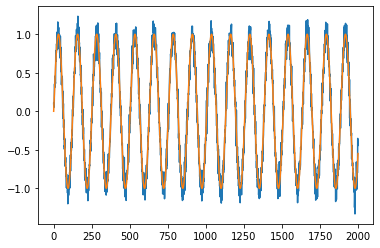

In [6]:
plt.plot (data [:2000])
plt.plot (ideal [:2000])
plt.show()

In [7]:
off = 3
length = off*2 + 1

In [8]:
X = np.array ([np.diag(np.hstack ((data [i:i + off], data [i + off + 1: i+ length]))) for i in range (N - length) ])

Y = data [off: N - off -1]

In [9]:
print (X.shape, Y.shape, sep = "\n")

(9993, 6, 6)
(9993,)


In [10]:
model = Sequential()

In [11]:
model.add (Input ((length-1, length-1)))

In [12]:
model.add (Bidirectional (GRU(2)) )

In [13]:
model.add (Dense(1, activation = "linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 4)                120       
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

In [15]:
history = model.fit (X,Y, batch_size = 32, epochs = 10)

Epoch 1/10
313/313 [==============================] - 6s 6ms/step - loss: 0.0445
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0122
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0117
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0119
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0116
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0117
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0118
Epoch 8/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0116
Epoch 9/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0116
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0117


Делаем прогноз

In [16]:
M = 2000
XX = np.zeros(M)

In [17]:
XX [:off] = data [:off]
for i in range (M-off-1):
  x = np.diag (np.hstack ( (XX [ i: i + off ], data [i + off +1: i + length])) )
  x = np.expand_dims (x, axis = 0)
  y = model.predict (x)
  XX [i + off + 1] = y

1/1 [==============================] - 0s 18ms/step


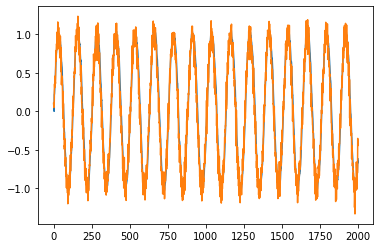

In [18]:
plt.plot (XX [:M])
plt.plot (data [:M])
plt.show()

Добавим метрику коэффициента фильтрации (отношения спрогнозированной sin-ды к исходному сигналу (сигналу с шумом)

In [19]:
K =(XX [:M]/ data [:M])
print (K)

[1.         1.         1.         ... 1.83431378 1.51023948 1.39457925]


In [20]:
print(K [:100])

[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
  1.61581712e+00  6.54768562e-01  7.28823336e-01  9.57794793e-01
  9.52613518e-01  7.97328170e-01  9.83850090e-01  1.15835245e+00
  1.45989778e+00  8.77379378e-01  7.69215154e-01  9.94863043e-01
  1.05930237e+00  9.85128236e-01  1.01558875e+00  9.24098003e-01
  1.04824049e+00  1.02610980e+00  1.05449595e+00  8.95422118e-01
  1.03441214e+00  1.07548786e+00  1.06985211e+00  8.75559318e-01
  1.03022127e+00  9.53404463e-01  9.78880474e-01  1.06274412e+00
  9.78504518e-01  9.19065032e-01  1.22754023e+00  1.06680326e+00
  1.00267329e+00  1.06448514e+00  9.48359493e-01  1.18150788e+00
  1.26811051e+00  1.02693885e+00  1.14572456e+00  1.31254614e+00
  9.29554987e-01  1.10806129e+00  1.14056039e+00  1.30520486e+00
  9.76723102e-01  1.43193745e+00  9.90109024e-01  1.85957631e+00
  1.54414236e+00  1.32425000e+00  1.35001899e+00  1.49353677e+00
  1.15380295e+00  1.04496971e+00  2.38218798e+00  7.94133494e+00
  1.05610175e+01  9.05852

In [21]:
print(np.argmax((XX [:M]/ data [:M])))

63


In [22]:
print(np.argmax(K))

63


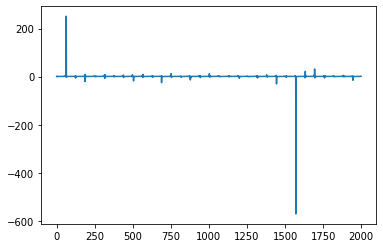

In [23]:

plt.plot (XX [:M]/ data [:M])
plt.show()

Добавим метрику коэффициента фильтрации (отношения спрогнозированной sin-ды к идеальной синусоиде

In [24]:
I =(XX [:M]/ ideal [:M])
print (K)

[1.         1.         1.         ... 1.83431378 1.51023948 1.39457925]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [25]:
print(I [:100])

[         inf   0.96660619   1.04404235   0.           1.10213131
   0.9000756    0.87806634   0.86075194   0.91521353   0.83945194
   0.78270555   0.84054672   0.93311421   0.96983663   0.94048218
   0.94647528   0.97094224   0.99503779   0.99081218   0.99504775
   0.98990054   1.01686093   1.01528511   1.0099706    0.99390478
   1.02546787   1.03057352   1.04065557   1.03296242   1.03500433
   1.0304412    1.03913127   1.0205528    1.00260473   1.00411707
   1.02514717   1.03369376   1.01903611   0.99995925   0.99888127
   1.01757229   1.02194039   1.05012432   1.0823247    1.12047005
   1.10099807   1.15059972   1.15630531   1.19932627   1.15076631
   1.16030627   1.15054089   1.23863649   1.2836545    1.37160273
   1.49428718   1.55818298   1.49546616   1.45937406   1.80469678
   2.04015575   2.57733995   4.68003685 -18.59762982  -1.68074367
  -0.32923758   0.11691978   0.38651476   0.61117006   0.68777789
   0.75148067   0.68152144   0.72947509   0.8149562    0.88033554
   0.86892

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


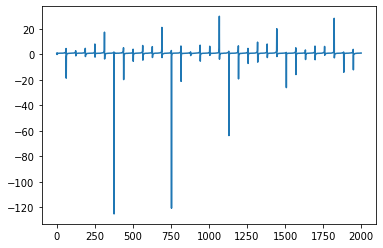

In [26]:
plt.plot (XX [:M]/ ideal [:M])
plt.show()